In [2]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CRiFbZDYnIzw2ChrQvuy")
project = rf.workspace("testtrui").project("test-robo-vohij")
version = project.version(2)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TEST-robo-2 in yolov12:: 100%|██████████| 192/192 [00:00<00:00, 7932.33it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO('yolo12s.pt')
model.train (
    data = "/content/TEST-robo-2/data.yaml",
    epochs = 25,
    imgsz = 640
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/TEST-robo-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1ec494c5c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,


image 1/1 /content/TEST-robo-2/train/images/clip2_mp4-0017_jpg.rf.8c448419256d8ccaff71ea4cac66a273.jpg: 384x640 3 Breakers, 3 Phantoms, 2 Pudges, 1 Tower, 2 Venoms, 1 Visage, 3 dirRangeds, 1 radRanged, 63.4ms
Speed: 1.7ms preprocess, 63.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


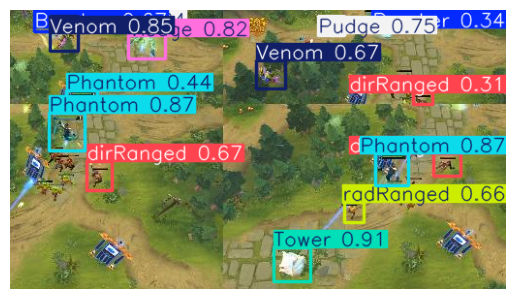

In [6]:
import cv2
import matplotlib.pyplot as plt

model = YOLO ('/content/runs/detect/train/weights/best.pt')
image_path = '/content/TEST-robo-2/train/images/clip2_mp4-0017_jpg.rf.8c448419256d8ccaff71ea4cac66a273.jpg'

results = model.predict(source = image_path, imgsz = 640, conf=0.25)

for r in results:
  im_array = r.plot()
  im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
  plt.imshow(im_rgb)
  plt.axis('off')
  plt.show()


In [ ]:
from ultralytics import YOLO
model = YOLO ('/content/runs/detect/train/weights/best.pt')
results = model.predict(source = "/content/clip2.mp4", imgsz = 640, conf=0.25, save = True)